In [598]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D


# Load the model
base_model  = load_model('/kaggle/input/deepfake/other/default/1/hybrid5_deepfake_detection_model2.h5')

In [599]:
import numpy as np
import pandas as pd
import os
import glob
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing import image
import seaborn as sns
from sklearn import metrics

In [600]:
main_path = '/kaggle/input/sldatda/F1data'

train_dir = '/kaggle/input/sldatda/F1data/train'
valid_dir = '/kaggle/input/sldatda/F1data/valid'
test_dir = '/kaggle/input/sldatda/F1data/test'

In [601]:
print("Train_dir Subfolders: ", os.listdir(train_dir))
print("Valid_dir Subfolders: ", os.listdir(valid_dir))
print("Test_dir Subfolders: ", os.listdir(test_dir))

Train_dir Subfolders:  ['fake', 'real']
Valid_dir Subfolders:  ['fake', 'real']
Test_dir Subfolders:  ['fake', 'real']


In [602]:
images_df = {
    "folder":[],
    "image_path":[],
    "label":[]
}

for folder in os.listdir(main_path): #iterate on each train, valid and test folder
    for label in os.listdir(main_path + "/" + folder): #iterate on fake and real folders (labels)
        for img in glob.glob(main_path + "/" + folder + "/" + label + "/*.jpg"):
            images_df["folder"].append(folder)
            images_df["image_path"].append(img)
            images_df["label"].append(label)

In [603]:
images_df = pd.DataFrame(images_df)

In [604]:
images_df

folder                                         image_path label
0    valid  /kaggle/input/sldatda/F1data/valid/real/IMG-20...  real
1    valid  /kaggle/input/sldatda/F1data/valid/real/IMG-20...  real
2    valid  /kaggle/input/sldatda/F1data/valid/real/IMG-20...  real
3    valid  /kaggle/input/sldatda/F1data/valid/real/IMG-20...  real
4    valid  /kaggle/input/sldatda/F1data/valid/real/IMG-20...  real
..     ...                                                ...   ...
189  train  /kaggle/input/sldatda/F1data/train/real/IMG-20...  real
190  train  /kaggle/input/sldatda/F1data/train/real/FB_IMG...  real
191  train  /kaggle/input/sldatda/F1data/train/real/IMG-20...  real
192  train  /kaggle/input/sldatda/F1data/train/real/IMG-20...  real
193  train  /kaggle/input/sldatda/F1data/train/real/IMG-20...  real

[194 rows x 3 columns]

In [605]:
real_grouped_df = images_df[images_df['label'] == "real"].groupby('folder')
fake_grouped_df = images_df[images_df['label'] == "fake"].groupby('folder')

In [606]:
real_grouped_df.size()

folder
test      15
train    117
valid     15
dtype: int64

In [607]:
fake_grouped_df.size()

folder
train    47
dtype: int64

In [608]:
# Set up ImageDataGenerator for data augmentation and loading
image_train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255.,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,  # Optional zoom
    brightness_range=[0.8, 1.2],  # Optional brightness adjustment
)



image_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

In [609]:
train_ds = image_train_gen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=64,
    class_mode='binary',
)

valid_ds = image_gen.flow_from_directory(
    valid_dir,
    target_size=(256, 256),
    batch_size=64,
    class_mode='binary'
)

test_ds = image_gen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=64,
    class_mode='binary',
    shuffle=False) #shuffle disabled

Found 240 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [610]:
def plot_images(img, label):
    plt.figure(figsize=[12, 12])
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.imshow(img[i])
        plt.axis('off')
        if label[i] == 0:
            plt.title("Fake")
        else:
            plt.title("Real")

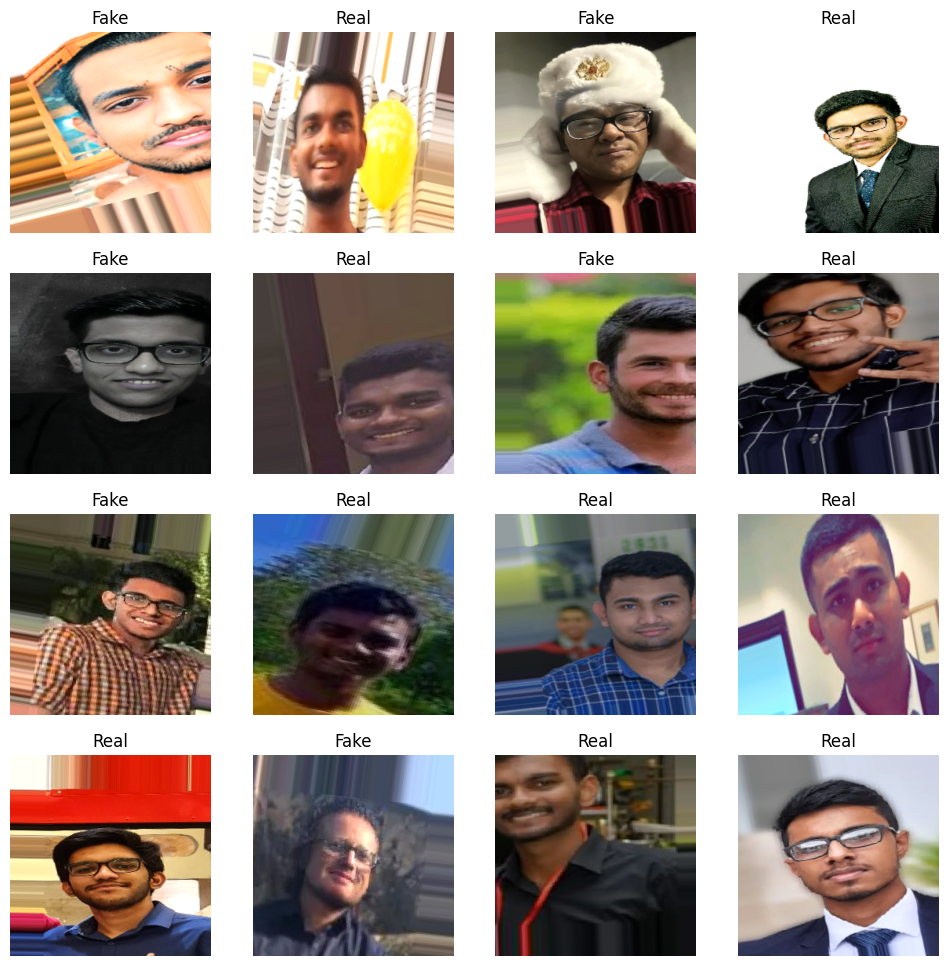

In [611]:
img,lbl = next(train_ds)
plot_images(img,lbl)

for img, label in train_ds:
    print(img.shape)
    print(label.shape)
    break

predicting on srilankan data

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


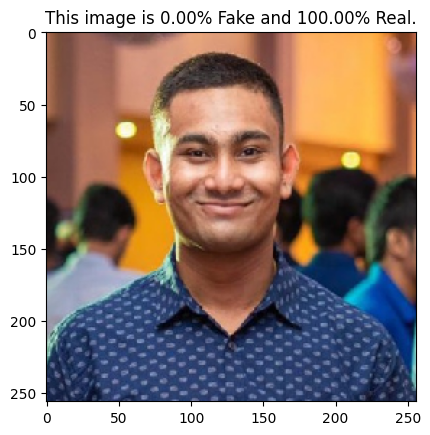

In [612]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Provide the path to your uploaded personal image
your_image_path = '/kaggle/input/sldatda/F1data/test/real/IMG-20240801-WA0003.jpg'  # Update this path to the correct image path
your_image = tf.keras.preprocessing.image.load_img(your_image_path, target_size=(256, 256, 3))

# Display your image
plt.imshow(your_image)

# Convert image to an array
your_image_arr = tf.keras.preprocessing.image.img_to_array(your_image)
your_image_arr = np.expand_dims(your_image_arr, axis=0)
your_image_arr = your_image_arr / 255.0

# Predict using your model
result = base_model.predict(your_image_arr)

# Display the result with the title
plt.title(f"This image is {100 * (1 - result[0][0]):.2f}% Fake and {100 * result[0][0]:.2f}% Real.")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


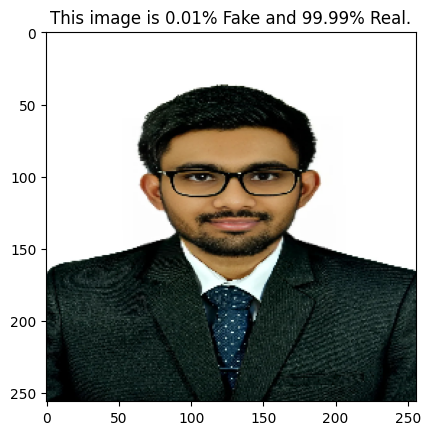

In [613]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Provide the path to your uploaded personal image
your_image_path = '/kaggle/input/sldatda/F1data/test/fake/d0cb440485c58e2b49fff0662d9fc4d3.jpeg'  # Update this path to the correct image path
your_image = tf.keras.preprocessing.image.load_img(your_image_path, target_size=(256, 256, 3))

# Display your image
plt.imshow(your_image)

# Convert image to an array
your_image_arr = tf.keras.preprocessing.image.img_to_array(your_image)
your_image_arr = np.expand_dims(your_image_arr, axis=0)
your_image_arr = your_image_arr / 255.0

# Predict using your model
result = base_model.predict(your_image_arr)

# Display the result with the title
plt.title(f"This image is {100 * (1 - result[0][0]):.2f}% Fake and {100 * result[0][0]:.2f}% Real.")
plt.show()

In [614]:
# Check the shapes of image and label batches
for img, label in train_ds:
    print("Image batch shape:", img.shape)
    print("Label batch shape:", label.shape)
    break

Image batch shape: (64, 256, 256, 3)
Label batch shape: (64,)


**Finetuning the Globle context model**

In [615]:
# Check the shapes of image and label batches
for img, label in test_ds:
    print("Image batch shape:", img.shape)
    print("Label batch shape:", label.shape)
    break

Image batch shape: (30, 256, 256, 3)
Label batch shape: (30,)


In [616]:

# Unfreeze layers (you can unfreeze more layers as needed)
for layer in base_model.layers[-10:]:  # Unfreeze the last 10 layers, adjust as necessary
    layer.trainable = True


In [617]:
x = base_model.output

In [618]:
print(x.shape)  

(None, 1)


In [619]:

from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

# Assume base_model is the loaded previously trained model
x = base_model.layers[-2].output  # assuming the last layer is before the output layer

# Flatten the output of the pre-trained model
x = Flatten()(x)


# Add another dense layer
x = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

# Output layer with sigmoid activation for binary classification
x = Dense(1, activation='sigmoid')(x)

# Create the new model
model = Model(inputs=base_model.input, outputs=x)



In [620]:
# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7)


In [621]:
model.compile(optimizer=Adam(learning_rate=1e-4),
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [622]:
# Train the model
history = model.fit(train_ds,
                    validation_data=valid_ds,
                    epochs=50,  # Adjust based on model performance
                    callbacks=[early_stopping, lr_reduction],
                    verbose=1)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.4445 - loss: 4.5323 

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 61s 8s/step - accuracy: 0.4447 - loss: 4.5239 - val_accuracy: 0.4667 - val_loss: 4.1807 - learning_rate: 1.0000e-04
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 234ms/step - accuracy: 0.4578 - loss: 4.4413 - val_accuracy: 0.5333 - val_loss: 4.1180 - learning_rate: 1.0000e-04
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 218ms/step - accuracy: 0.5022 - loss: 4.3817 - val_accuracy: 0.6333 - val_loss: 4.0948 - learning_rate: 1.0000e-04
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 215ms/step - accuracy: 0.4949 - loss: 4.2929 - val_accuracy: 0.6333 - val_loss: 4.0812 - learning_rate: 1.0000e-04
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 231ms/step - accuracy: 0.5101 - loss: 4.2836 - val_accuracy: 0.5667 - val_loss: 4.0701 - learning_rate: 1.0000e-04
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 214ms/step - accuracy: 0.4681 - loss: 4.2970 - val_accuracy: 0.5333 - val_loss: 4.0664 - learning_rate: 1.0000e-04
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 157ms/step - accuracy: 0.5442 - loss: 4.2444 - val

In [623]:
test_loss, test_acc = model.evaluate(train_ds)
print(f"Test Accuracy: {test_acc*100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.6026 - loss: 3.9574 
Test Accuracy: 60.42%


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


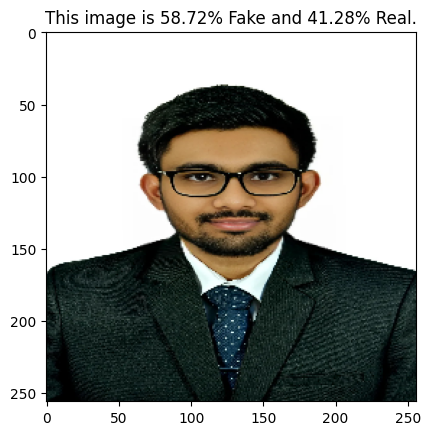

In [624]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Provide the path to your uploaded personal image
your_image_path = '/kaggle/input/sldatda/F1data/test/fake/d0cb440485c58e2b49fff0662d9fc4d3.jpeg'  # Update this path to the correct image path
your_image = tf.keras.preprocessing.image.load_img(your_image_path, target_size=(256, 256, 3))

# Display your image
plt.imshow(your_image)

# Convert image to an array
your_image_arr = tf.keras.preprocessing.image.img_to_array(your_image)
your_image_arr = np.expand_dims(your_image_arr, axis=0)
your_image_arr = your_image_arr / 255.0

# Predict using your model
result = model.predict(your_image_arr)

# Display the result with the title
plt.title(f"This image is {100 * (1 - result[0][0]):.2f}% Fake and {100 * result[0][0]:.2f}% Real.")
plt.show()

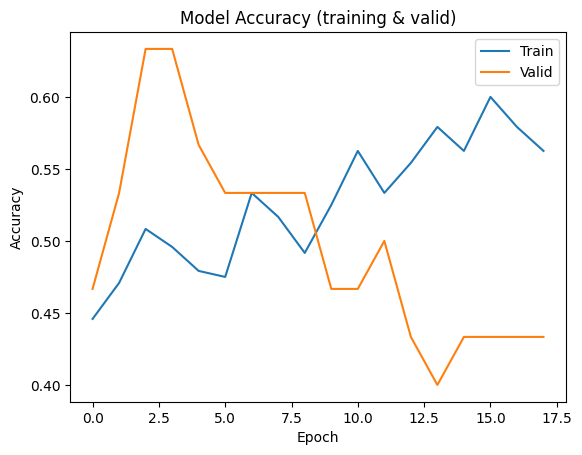

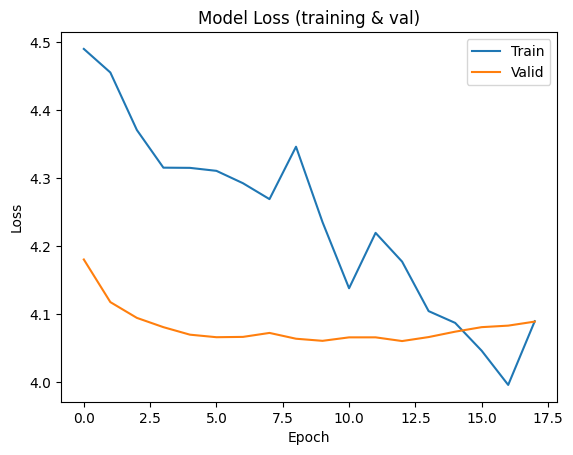

In [625]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy (training & valid)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper right')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss (training & val)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper right')
plt.show()


In [626]:
# Assuming you have defined your model as 'hybrid_model'
predicted_labels = model.predict(test_ds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


In [627]:
true_labels = test_ds.classes

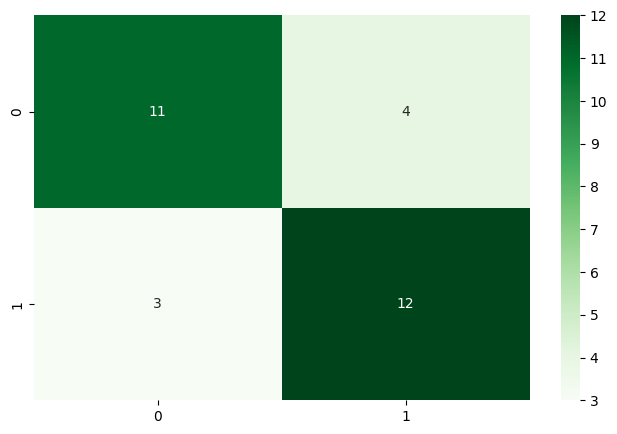

In [628]:
plt.figure(figsize = (8,5))
sns.heatmap(metrics.confusion_matrix(true_labels, predicted_labels.round()), annot = True,fmt="d",cmap = "Greens")
plt.show()

In [630]:
#model.save("deepfake retrain2.h5")

In [26]:
#create a function to predict the images

def predictImage(image_path,model2):
    # Provide the path to your uploaded personal image
    #your_image_path = '/kaggle/input/sldatda/F1data/test/fake/d0cb440485c58e2b49fff0662d9fc4d3.jpeg'  # Update this path to the correct image path
    your_image = tf.keras.preprocessing.image.load_img(image_path, target_size=(256, 256, 3))

    # Display your image
    plt.imshow(your_image)

    # Convert image to an array
    your_image_arr = tf.keras.preprocessing.image.img_to_array(your_image)
    your_image_arr = np.expand_dims(your_image_arr, axis=0)
    your_image_arr = your_image_arr / 255.0

    # Predict using your model
    result = model2.predict(your_image_arr)

    # Display the result with the title
    plt.title(f"This image is {100 * (1 - result[0][0]):.2f}% Fake and {100 * result[0][0]:.2f}% Real.")
    plt.show()

In [27]:
from tensorflow.keras.models import load_model

model2  = load_model('/kaggle/input/slmodel/other/default/1/deepfake _srilankan.h5')

**Srilankan context model testing on srilankan test data** 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


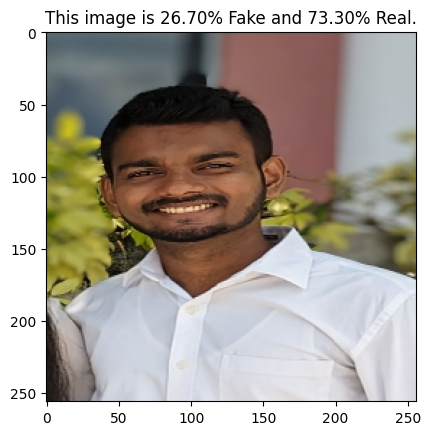

In [30]:
image_path = "/kaggle/input/sldatda/F1data/test/real/PXL_20240508_063653646~2.jpg"
predictImage(image_path,model2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


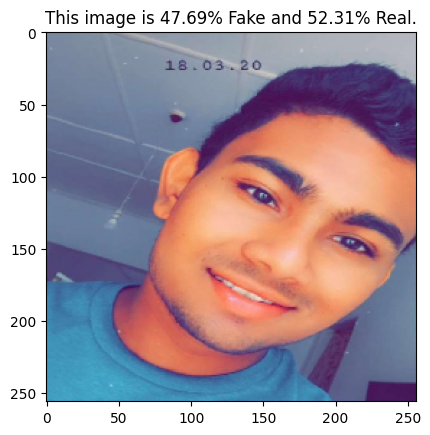

In [31]:
image_path = "/kaggle/input/sldatda/F1data/test/real/IMG-20240801-WA0007.jpg"
predictImage(image_path,model2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


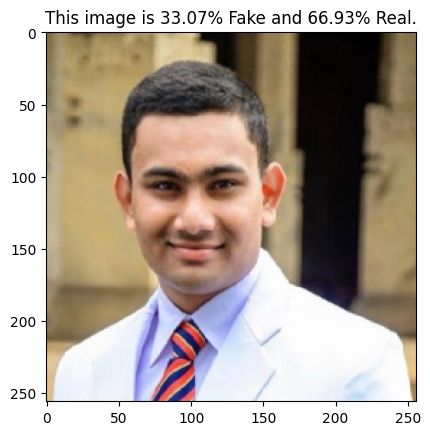

In [32]:
image_path = "/kaggle/input/sldatda/F1data/test/real/IMG-20240801-WA0005.jpg"
predictImage(image_path,model2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


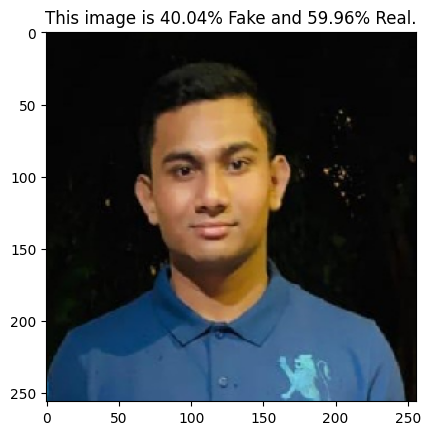

In [33]:
image_path = "/kaggle/input/sldatda/F1data/test/real/IMG-20240801-WA0013.jpg"
predictImage(image_path,model2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


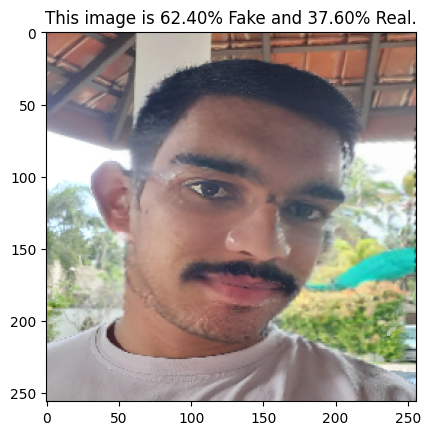

In [35]:
image_path = "/kaggle/input/sldatda/F1data/test/fake/cf670cc25d4f01c84cc7bdb2c59102c1.jpeg"
predictImage(image_path,model2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


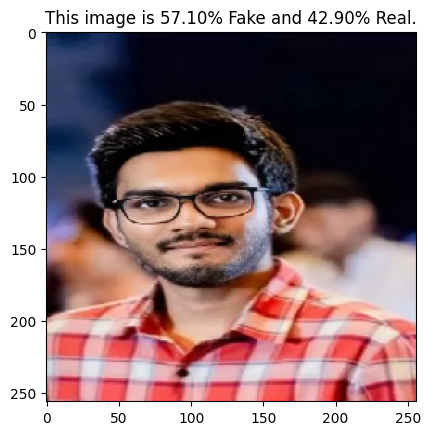

In [37]:
image_path = "/kaggle/input/sldatda/F1data/test/fake/db02d3592e45cb3c51efb5513062fcd8.jpeg"
predictImage(image_path,model2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


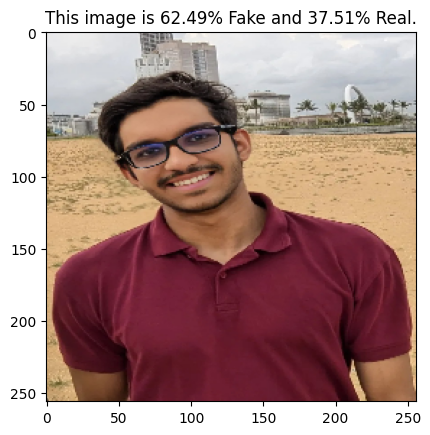

In [38]:
image_path = "/kaggle/input/sldatda/F1data/test/fake/debce92135f1fcf65c1571f53b7d9edc.jpeg"
predictImage(image_path,model2)

**Srilankan context model testing on globle data**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


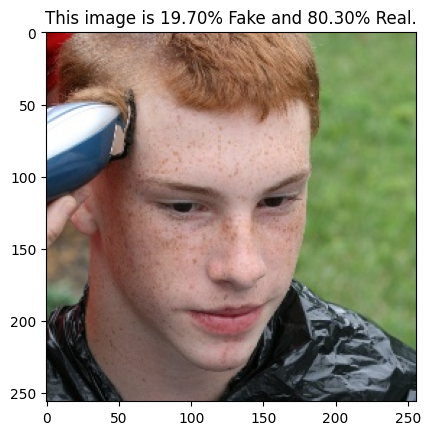

In [29]:
image_path = "/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/test/real/00053.jpg"
predictImage(image_path,model2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


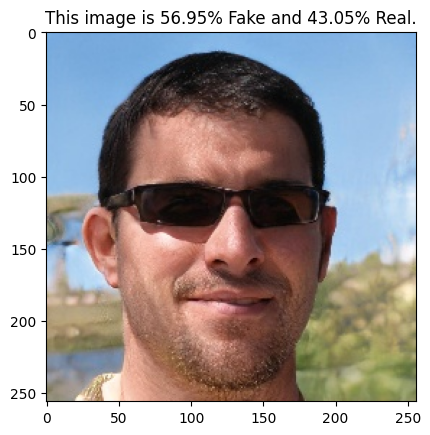

In [23]:
image_path = "/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/test/fake/00PB1BNIE8.jpg"
predictImage(image_path,model2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


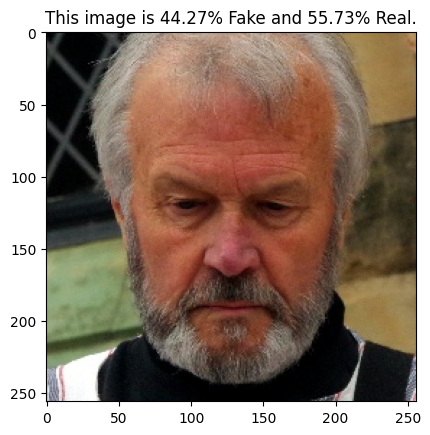

In [24]:
image_path = "/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/test/real/00142.jpg"
predictImage(image_path,model2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


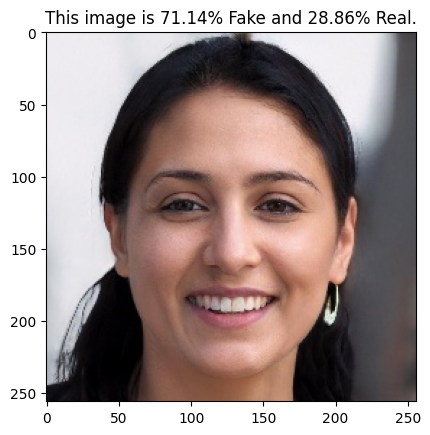

In [25]:
image_path = "/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/test/fake/00XUQJZGHU.jpg"
predictImage(image_path,model2)